In [2]:
import pandas as pd
import numpy as np

from parse import *
import os
import sklearn
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
#%matplotlib auto
import matplotlib.image as mpimg 
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.collections import PolyCollection
from collections import defaultdict
import datetime
from datetime import timedelta
import argparse
import helper
from graphHelper import *

In [3]:
'''
cmd不方便调试，就建了一个类充当参数输入的接口
'''
class Myclass():
    MinCountOfPoints=6 #这里我没改，因为分长时间和短时间计算时，我手动一起调了（详见最后一个part）
    MinCountOfPointsForAll=-1
    SizeOfGrid='0.5' # 不需要调 
    figure='floorplan01.png'
    path='./results_tag0/'
    res='./figures/'
    bySecond=False
    IntervalOfMinutesOrSeconds=1 # 1分钟 1个点  
    setConfig=True #False

arguments=Myclass()


In [4]:

##########################################
# Choose Family
##########################################
family_config = helper.chooseFamily()

max_x = family_config.size[1]
min_x = family_config.size[0]
max_y = family_config.size[3]
min_y = family_config.size[2]


unit = float(arguments.SizeOfGrid)  #网格单元长宽m
column_num = int((max_x-min_x)//unit)
row_num = int((max_y-min_y)//unit)
map_img = mpimg.imread(arguments.figure)

# time epsilon to select the data point
epsilon = 15 #timedelta(minutes=10)
min_count = arguments.MinCountOfPoints

# define time
year = 2022
input_path = arguments.path
res_path = arguments.res
C = 0

==>Familiy choices :<==
1 :ParentsOfSun
2 :UncleOfSun
3 :AuntOfSun
Family of UncleOfSun is chosen!

Trace familes:
	UncleOfSun
	size of house : [-3.6, 4.55, -1.8, 11.4]
		Scenario=Shift
			zone 1: OutDoor
				{ x : [2.85,1000.0],y : [4.25,8.0] => Delete
			zone kitchen: InKitchen
				{ x : [1.15,2.85],y : [8.9,11.4] => DoNothing
			zone 2: OutKitchen
				{ x : [2.85,1000.0],y : [8.9,1000.0] => MoveToLeftDown
			zone 3: OutKitchen
				{ x : [1.15,2.85],y : [11.4,1000.0] => MoveToDown
			zone 4: OutKitchen
				{ x : [-0.2,1.15],y : [8.9,1000.0] => MoveToDown
			zone balcony: InBalcony
				{ x : [-0.2,3.7],y : [-1.8,-0.6] => DoNothing
			zone 5: OutBalcony
				{ x : [3.7,1000.0],y : [-1000.0,-0.6] => MoveToLeftUp
			zone 6: OutBalcony
				{ x : [-0.2,3.7],y : [-1000.0,-1.8] => MoveToUp
			zone 7: OutBalcony
				{ x : [-1000.0,-0.2],y : [-1000.0,-0.6] => MoveToRightUp
			zone living room: InLiving
				{ x : [-0.2,3.7],y : [-0.6,4.25] => DoNothing
			zone 8: OutLiving
				{ x : [-0.7,-0.2],

In [5]:
"""
Read Data
"""
n = arguments.IntervalOfMinutesOrSeconds
if n == 1:
    if arguments.bySecond:
        end_suffix = '_dataBySecond.xlsx'
    else:
        end_suffix = '_dataByMinute.xlsx'
else:
    if arguments.bySecond:
        end_suffix = '_dataBy'+str(n)+'Seconds.xlsx'
    else:
        end_suffix = '_dataBy'+str(n)+'Minutes.xlsx'
    

# read files
files = [f for f in os.listdir(input_path) if f.endswith(end_suffix)]
# read data
print("Files read are :", files)
tags_order = []
all_points_array = []
dict_df = {}
list_df = []
# data collection for one
data_collection = []

if arguments.MinCountOfPointsForAll == -1:
    C = min_count * len(files)
else:
    C = arguments.MinCountOfPointsForAll

    

for f in files:
    df = pd.read_excel(open(input_path+f,'rb')) 

    # 修改门口坐标
    print(df)
    
    df.loc[(df['x值'] == 2.1175,'x值')] = 1000000
    
    # 修改门口坐标-tag0
    # print(df)
    # df.loc[(((abs(df['x值']-2.1175)<0.0001) &(abs(df['y值']-6.27)<0.0001))|
    #         ((abs(df['x值']-1.14875)<0.0001) &(abs(df['y值']-1.75875)<0.0001))|
    #         ((abs(df['x值']-1.4475845)<0.0001) &(abs(df['y值']-6.7912643)<0.0001))|
    #         ((abs(df['x值']-1.44)<0.0001) &(abs(df['y值']-6.77999999999999)<0.0001))|
    #         ((abs(df['x值']-1.54444444444445)<0.0001) &(abs(df['y值']-6.5888888888889)<0.0001))|
    #         ((abs(df['x值']-1.53142857142857)<0.0001) &(abs(df['y值']-6.65428571428572)<0.0001))|
    #         ((abs(df['x值']- -0.04)<0.0001) &(abs(df['y值']-6.86000000000001)<0.0001))|
    #         ((abs(df['x值']-1.44666666666667)<0.0001) &(abs(df['y值']-6.57833333333332)<0.0001))|
    #         ((abs(df['x值']-1.364)<0.0001) &(abs(df['y值']-5.886)<0.0001))|
    #         ((abs(df['x值']-2.05)<0.0001) &(abs(df['y值']-7.88333333333333)<0.0001))|
    #         ((abs(df['x值']-1.81)<0.0001) &(abs(df['y值']-7.94)<0.0001))|
    #         ((abs(df['x值']- -0.025)<0.0001) &(abs(df['y值']-5.41833333333333)<0.0001))|
    #         ((abs(df['x值']- -0.04)<0.0001) &(abs(df['y值']-7.05500000000001)<0.0001))|
    #         ((abs(df['x值']-0.38)<0.0001) &(abs(df['y值']-7.89999999999999)<0.0001))|
    #         ((abs(df['x值']-0.35)<0.0001) &(abs(df['y值']-7.505)<0.0001))|
    #         ((abs(df['x值']-1.11)<0.0001) &(abs(df['y值']-6.66000000000001)<0.0001))|
    #         ((abs(df['x值']-1.40833333333333)<0.0001) &(abs(df['y值']-6.71499999999999)<0.0001))|
    #         ((abs(df['x值']-1.34714285714286)<0.0001) &(abs(df['y值']-6.56857142857143)<0.0001))|
    #         ((abs(df['x值']-1.56111111111111)<0.0001) &(abs(df['y值']-6.63333333333333)<0.0001))|
    #         ((abs(df['x值']-1.18)<0.0001) &(abs(df['y值']-6.86200000000001)<0.0001))|
    #         ((abs(df['x值']-0.56125)<0.0001) &(abs(df['y值']-3.25749999999999)<0.0001))|
    #         ((abs(df['x值']-1.5325)<0.0001) &(abs(df['y值']-6.5675)<0.0001))|
    #         ((abs(df['x值']-0.817777777777778)<0.0001) &(abs(df['y值']-6.74333333333334)<0.0001))|
    #         ((abs(df['x值']-1.215)<0.0001) &(abs(df['y值']-6.83)<0.0001))|
    #         ((abs(df['x值']-1.343)<0.0001) &(abs(df['y值']-6.68599999999999)<0.0001))|
    #         ((abs(df['x值']-1.35333333333333)<0.0001) &(abs(df['y值']-6.66166666666667)<0.0001))|
    #         ((abs(df['x值']-0.954444444444446)<0.0001) &(abs(df['y值']-6.77666666666666)<0.0001))|
    #         ((abs(df['x值']-1.28)<0.0001) &(abs(df['y值']-6.62)<0.0001))|
    #         ((abs(df['x值']-1.316)<0.0001) &(abs(df['y值']-6.656)<0.0001))|
    #         ((abs(df['x值']-1.16)<0.0001) &(abs(df['y值']-2.135)<0.0001))|
    #         ((abs(df['x值']-1.21142857142857)<0.0001) &(abs(df['y值']-6.85142857142858)<0.0001))|
    #         ((abs(df['x值']-1.418)<0.0001) &(abs(df['y值']-6.916)<0.0001))|
    #         ((abs(df['x值']-1.2475)<0.0001) &(abs(df['y值']-1.9625)<0.0001))|
    #         ((abs(df['x值']-1.58)<0.0001) &(abs(df['y值']-6.62)<0.0001))|
    #         ((abs(df['x值']-1.552)<0.0001) &(abs(df['y值']-6.85199999999999)<0.0001))|
    #         ((abs(df['x值']-1.47)<0.0001) &(abs(df['y值']-6.35)<0.0001))|
    #         ((abs(df['x值']-1.146)<0.0001) &(abs(df['y值']-6.39600000000001)<0.0001))|
    #         ((abs(df['x值']-1.31)<0.0001) &(abs(df['y值']-6.43666666666667)<0.0001))|
    #         ((abs(df['x值']-1.57444444444444)<0.0001) &(abs(df['y值']-6.56888888888888)<0.0001))|
    #         ((abs(df['x值']-1.08333333333333)<0.0001) &(abs(df['y值']-6.53333333333334)<0.0001))
    #         ), 'x值'] = 3.0
           
    # df.loc[((abs(df['x值'] - 3.0)<0.0001) & 
    #         ((abs(df['y值']-6.27)<0.0001)| 
    #          (abs(df['y值']-1.75875)<0.0001)|
    #          (abs(df['y值']-6.7912643)<0.0001)|
    #          (abs(df['y值']-6.77999999999999)<0.0001)|
    #          (abs(df['y值']-6.5888888888889)<0.0001)|
    #          (abs(df['y值']-6.77999999999999)<0.0001)|
    #          (abs(df['y值']-6.5888888888889)<0.0001)|
    #          (abs(df['y值']-6.65428571428572)<0.0001)|
    #          (abs(df['y值']-6.86000000000001)<0.0001)|
    #          (abs(df['y值']-6.57833333333332)<0.0001)|
    #          (abs(df['y值']-5.886)<0.0001)|
    #          (abs(df['y值']-7.88333333333333)<0.0001)|
    #          (abs(df['y值']-7.94)<0.0001)|
    #          (abs(df['y值']-5.41833333333333)<0.0001)|
    #          (abs(df['y值']-7.05500000000001)<0.0001)|
    #          (abs(df['y值']-7.89999999999999)<0.0001)|
    #          (abs(df['y值']-7.505)<0.0001)|
    #          (abs(df['y值']-6.66000000000001)<0.0001)|
    #          (abs(df['y值']-6.71499999999999)<0.0001)|
    #          (abs(df['y值']-6.56857142857143)<0.0001)|
    #          (abs(df['y值']-6.63333333333333)<0.0001)|
    #          (abs(df['y值']-6.86200000000001)<0.0001)|
    #          (abs(df['y值']-3.25749999999999)<0.0001)|
    #          (abs(df['y值']-6.5675)<0.0001)|
    #          (abs(df['y值']-6.83)<0.0001)|
    #          (abs(df['y值']-6.74333333333334)<0.0001)|
    #          (abs(df['y值']-6.68599999999999)<0.0001)|
    #          (abs(df['y值']-6.66166666666667)<0.0001)|
    #          (abs(df['y值']-6.77666666666666)<0.0001)|
    #          (abs(df['y值']-6.62)<0.0001)|
    #          (abs(df['y值']-6.656)<0.0001)|
    #          (abs(df['y值']-2.135)<0.0001)|
    #          (abs(df['y值']-6.85142857142858)<0.0001)|
    #          (abs(df['y值']-6.916)<0.0001)|
    #          (abs(df['y值']-1.9625)<0.0001)|
    #          (abs(df['y值']-6.62)<0.0001)|
    #          (abs(df['y值']-6.85199999999999)<0.0001)|
    #          (abs(df['y值']-6.35)<0.0001)|
    #          (abs(df['y值']-6.39600000000001)<0.0001)|
    #          (abs(df['y值']-6.43666666666667)<0.0001)|
    #          (abs(df['y值']-6.56888888888888)<0.0001)|
    #          (abs(df['y值']-6.53333333333334)<0.0001)
    #          )),'y值'] = 5.0
    
#'''''tag1'''
    df.loc[(((abs(df['x值']- 0.3225)<0.0001)& (abs(df['y值']-6.3725)<0.0001))|
            ((abs(df['x值']- -0.14)<0.0001)& (abs(df['y值']-5.12)<0.0001))|
            ((abs(df['x值']- 1.61333333333333)<0.0001) & (abs(df['y值']-6.97166666666668)<0.0001))|
            ((abs(df['x值']- 0.378333333333334)<0.0001)& (abs(df['y值']-6.40166666666666)<0.0001))|
            ((abs(df['x值']- 0.656999999999999)<0.0001) & (abs(df['y值']-6.48)<0.0001))|
            ((abs(df['x值']- 0.55)<0.0001) & (abs(df['y值']-6.47000000000001)<0.0001))|
            ((abs(df['x值']- 2.77142857142857)<0.0001) & (abs(df['y值']-4.45285714285714)<0.0001))|
            ((abs(df['x值']- -0.03)<0.0001) & (abs(df['y值']-6.97000000000001)<0.0001))|
            ((abs(df['x值']- 1.08333333333333)<0.0001)& (abs(df['y值']-7.36166666666668)<0.0001))|
            ((abs(df['x值']- -0.065)<0.0001) & (abs(df['y值']-7.455)<0.0001))|
            ((abs(df['x值']- 0.903999999999998)<0.0001) & (abs(df['y值']-6.63)<0.0001))|
            ((abs(df['x值']- 0.725000000000001)<0.0001) & (abs(df['y值']-6.69999999999999)<0.0001))|
            ((abs(df['x值']- 0.855714285714285)<0.0001) & (abs(df['y值']-7.46857142857142)<0.0001))|
            ((abs(df['x值']- 0.76)<0.0001) & (abs(df['y值']-6.76666666666666)<0.0001))|
            ((abs(df['x值']- 0.335000000000001)<0.0001) & (abs(df['y值']-5.75)<0.0001))|
            ((abs(df['x值']- -0.205)<0.0001) & (abs(df['y值']-6.36000000000001)<0.0001))|
            ((abs(df['x值']- 1.75)<0.0001) & (abs(df['y值']-9.435)<0.0001))|
            ((abs(df['x值']- 0.86)<0.0001) & (abs(df['y值']-6.58)<0.0001))|
            ((abs(df['x值']- 0.414999999999999)<0.0001) & (abs(df['y值']-6.81)<0.0001))|
            ((abs(df['x值']- 2.8375)<0.0001) & (abs(df['y值']-4.585)<0.0001))|
            ((abs(df['x值']- 0.445)<0.0001) & (abs(df['y值']-6.50999999999999)<0.0001))|
            ((abs(df['x值']- 0.899999999999999)<0.0001) & (abs(df['y值']-5.31999999999999)<0.0001))|
            ((abs(df['x值']- 0.04)<0.0001) & (abs(df['y值']-6.13)<0.0001))|
            ((abs(df['x值']- 1.05)<0.0001) & (abs(df['y值']-6.65333333333333)<0.0001))|
            ((abs(df['x值']- 0.82)<0.0001) & (abs(df['y值']-7.19428571428572)<0.0001))|
            ((abs(df['x值']- 1.11)<0.0001) & (abs(df['y值']-6.60000000000001)<0.0001))|
            ((abs(df['x值']- 0.355)<0.0001) & (abs(df['y值']-6.60833333333333)<0.0001))|
            ((abs(df['x值']- 0.420000000000001)<0.0001) & (abs(df['y值']-7.06999999999999)<0.0001))|
            ((abs(df['x值']- 0.44)<0.0001) & (abs(df['y值']-5.56999999999999)<0.0001))|
            ((abs(df['x值']- 2.775)<0.0001) & (abs(df['y值']-4.63)<0.0001))|
            ((abs(df['x值']- 3.88)<0.0001) & (abs(df['y值']-8.41750000000001)<0.0001))|
            ((abs(df['x值']- 1.393)<0.0001) & (abs(df['y值']-7.408)<0.0001))|
            ((abs(df['x值']- 0.292)<0.0001) & (abs(df['y值']-6.08600000000001)<0.0001))      
            ), 'x值'] = 3.0
           
    df.loc[((abs(df['x值'] - 3.0)<0.0001) & 
            ((abs(df['y值']-6.3725)<0.0001) | 
             (abs(df['y值']-5.12)<0.0001)|
             (abs(df['y值']-6.97166666666668)<0.0001)|
             (abs(df['y值']-6.40166666666666)<0.0001)|
             (abs(df['y值']-6.48)<0.0001)|
             (abs(df['y值']-6.47000000000001)<0.0001)|
             (abs(df['y值']-4.45285714285714)<0.0001)|
             (abs(df['y值']-6.97000000000001)<0.0001)|
             (abs(df['y值']-7.36166666666668)<0.0001)|
             (abs(df['y值']-7.455)<0.0001)|
             (abs(df['y值']-6.63)<0.0001)|
             (abs(df['y值']-6.69999999999999)<0.0001)|
             (abs(df['y值']-7.46857142857142)<0.0001)|             
             (abs(df['y值']-6.76666666666666)<0.0001)|
             (abs(df['y值']-5.75)<0.0001)|
             (abs(df['y值']-6.36000000000001)<0.0001)|
             (abs(df['y值']-9.435)<0.0001)|
             (abs(df['y值']-6.58)<0.0001)|
             (abs(df['y值']-6.81)<0.0001)|
             (abs(df['y值']-4.585)<0.0001)|
             (abs(df['y值']-6.50999999999999)<0.0001)|
             (abs(df['y值']-5.31999999999999)<0.0001)|       
             (abs(df['y值']-6.13)<0.0001)|
             (abs(df['y值']-6.65333333333333)<0.0001)|
             (abs(df['y值']-7.19428571428572)<0.0001)|      
             (abs(df['y值']-6.60000000000001)<0.0001)|
             (abs(df['y值']-6.60833333333333)<0.0001)|      
             (abs(df['y值']-7.06999999999999)<0.0001)|
             (abs(df['y值']-5.56999999999999)<0.0001)|      
             (abs(df['y值']-4.63)<0.0001)|
             (abs(df['y值']-8.41750000000001)<0.0001)|
             (abs(df['y值']-7.408)<0.0001)|
             (abs(df['y值']-6.08600000000001)<0.0001)
             )),'y值'] = 5.0
    
    ori_df = df.copy()# store the non-shifted points
    # shift data
    if arguments.setConfig :
        print("==========>Start Shifting<============")
        df = shift(family_config,df)
        print("==========>End Shifting<============")
        # print(df_temp)

    # one copy of df
    df_copy = df.copy()

    parsed = parse("{}_{}_{}",f)
    my_date = str(year)+'-'+parsed[1][:2]+'-'+parsed[1][2:]
    date = str(dt.datetime.strptime(my_date, '%Y-%m-%d').date())

    points = []
    old_points = []
    key = parsed[0]+"_"+my_date 

    for i in range(len(df['hour'])):
        point = [df['x值'][i],df['y值'][i]]
        old_point = [ori_df['x值'][i],ori_df['y值'][i]]
        points.append(point)
        old_points.append(old_point)
        data_collection.append(point)
            
        # define new time for all in one
        # TODO : if necessary, to change all dataframe time
        new_time = pd.to_datetime(date + " " + df['time'][i].strftime("%H:%M:%S"))
        #df_copy['time'][i] = new_time
        df_copy.at[i,'time'] = new_time

    points_array = np.array(points)
    old_points_array = np.array(old_points)
    
    # create non-shifted scatter
    createScatter(old_points_array,key,map_img,res_path,max_x,min_x,max_y,min_y)
    #createScatter(points_array,key,map_img,res_path,max_x,min_x,max_y,min_y)

    tags_order.append(parsed[0])
    all_points_array.append(points_array)
        
    dict_df[key] =df_copy # change the time
    #print(all_points_array)
    list_df.append(df_copy)
    
print("==========>Finish Reading<============")
'''
dict_df:
key: 'tag0_2022_2_19'等
data: 当天的时间-点值 dataframe
'''

Files read are : ['tag0_0222_dataByMinute.xlsx', 'tag0_0223_dataByMinute.xlsx', 'tag0_0228_dataByMinute.xlsx', 'tag0_0301_dataByMinute.xlsx', 'tag0_0220_dataByMinute.xlsx', 'tag0_0307_dataByMinute.xlsx', 'tag0_0309_dataByMinute.xlsx', 'tag0_0224_dataByMinute.xlsx', 'tag0_0308_dataByMinute.xlsx', 'tag0_0310_dataByMinute.xlsx', 'tag0_0304_dataByMinute.xlsx', 'tag0_0305_dataByMinute.xlsx', 'tag0_0303_dataByMinute.xlsx', 'tag0_0226_dataByMinute.xlsx', 'tag0_0227_dataByMinute.xlsx', 'tag0_0225_dataByMinute.xlsx', 'tag0_0221_dataByMinute.xlsx', 'tag0_0306_dataByMinute.xlsx', 'tag0_0302_dataByMinute.xlsx']
     hour  minute      time  second        x值        y值
0       7      54  07:54:00    57.5  0.671528  6.760972
1       7      55  07:55:00    29.5  1.431000  6.790717
2       7      56  07:56:00    29.5  1.435000  6.790000
3       7      57  07:57:00    29.5  1.435000  6.790000
4       7      58  07:58:00    29.5  1.435000  6.790000
..    ...     ...       ...     ...       ...       ...
8

"\ndict_df:\nkey: 'tag0_2022_2_19'等\ndata: 当天的时间-点值 dataframe\n"

In [6]:
# collect all data by concatinate all dataframe to one
data_collection_array = np.array(data_collection)
df_week = pd.concat(list_df,sort=False)
# NOTE : necessary ! to remove the index for series in dataframe
df_week.reset_index(drop=True, inplace=True) 
print("read files :",files)
print(len(all_points_array))

nb_record = len(all_points_array)

# For sub plots(shifted)
# closed for now
"""
fig = plt.figure(figsize = (12,nb_record//4*3)) # NOTE: 可以修改出图尺寸
# create scatter
for i in range(0,nb_record):
    ax = plt.subplot(math.ceil(nb_record/4),4,i+1)
    # NOTE: 3 rows, and 8 columns
    #ax.text(0.5, 0.5, str((3,8,i)), fontsize=18, ha='center')
    #plt.title(my_date)
    ax.scatter(all_points_array[i][:,0],all_points_array[i][:,1],s=20)
"""
# NOTE : necessary !
createPath(res_path)
#fig.savefig(res_path+"shifted_scatter.png",dpi=300)
#plt.close(fig)

# For all in one plot
# fig = plt.figure(figsize = (15, 15)) # NOTE: 可以修改出图尺寸
# create scatter


read files : ['tag0_0222_dataByMinute.xlsx', 'tag0_0223_dataByMinute.xlsx', 'tag0_0228_dataByMinute.xlsx', 'tag0_0301_dataByMinute.xlsx', 'tag0_0220_dataByMinute.xlsx', 'tag0_0307_dataByMinute.xlsx', 'tag0_0309_dataByMinute.xlsx', 'tag0_0224_dataByMinute.xlsx', 'tag0_0308_dataByMinute.xlsx', 'tag0_0310_dataByMinute.xlsx', 'tag0_0304_dataByMinute.xlsx', 'tag0_0305_dataByMinute.xlsx', 'tag0_0303_dataByMinute.xlsx', 'tag0_0226_dataByMinute.xlsx', 'tag0_0227_dataByMinute.xlsx', 'tag0_0225_dataByMinute.xlsx', 'tag0_0221_dataByMinute.xlsx', 'tag0_0306_dataByMinute.xlsx', 'tag0_0302_dataByMinute.xlsx']
19
Directory  ./figures/  already exists


In [7]:
'''
shifted_scatter_allIn 数据清理后，总共14天的散点图
'''
fig,ax = plt.subplots(figsize=(int(max_x-min_x),int(max_y-min_y)))
ax.scatter(data_collection_array[:,0],data_collection_array[:,1],s=20) # data_collection_array: 第一列：x;第二列：y 排数=点数
plt.imshow(map_img,zorder = 0, extent=[min_x,max_x,min_y,max_y])
fig.savefig(res_path+"shifted_scatter_allInOne.png",dpi=300)
plt.close(fig)

In [8]:
number_cluster={}  # key=日期 value=当天的聚类数
totaltimes=pd.DataFrame(columns=['date','TimeAtHome']) # 每
dict_zones_dict={}

In [9]:
'''
统计每天的在家时间
'''
for key in dict_df.keys():
    data = collectData(dict_df,key)
    groups,grids = createGrid(data,key,column_num,row_num,max_x,min_x,max_y,min_y)
    data=WashData(data)
    # 记录每一天的在家时间
    totaltime=len(data)
    new_time=pd.DataFrame([[key, totaltime]],columns=['date','TimeAtHome'])
    totaltimes=totaltimes.append(new_time,ignore_index=True)

print(totaltimes)


    

After Collect Data:
                    time         x         y
0   2022-02-22 07:54:00  0.671528  6.760972
1   2022-02-22 07:55:00  1.431000  6.790717
2   2022-02-22 07:56:00  1.435000  6.790000
3   2022-02-22 07:57:00  1.435000  6.790000
4   2022-02-22 07:58:00  1.435000  6.790000
..                  ...       ...       ...
811 2022-02-22 21:25:00  2.976467  2.756036
812 2022-02-22 21:26:00  2.760000  3.028333
813 2022-02-22 21:27:00  2.760000  3.028333
814 2022-02-22 21:28:00  2.750726  3.018998
815 2022-02-22 21:29:00  1.994622  6.195071

[816 rows x 3 columns]
After Collect Data:
                    time         x         y
0   2022-02-23 07:19:00  1.390057  7.031773
1   2022-02-23 07:20:00  1.475714  6.994286
2   2022-02-23 07:21:00  1.475714  6.994286
3   2022-02-23 07:22:00  1.475714  6.994286
4   2022-02-23 07:23:00  1.475714  6.994286
..                  ...       ...       ...
881 2022-02-23 22:00:00  1.760000  7.680000
882 2022-02-23 22:01:00  1.163219  7.714219
883 2022-0

/tmp/ipykernel_52764/2215520477.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  totaltimes=totaltimes.append(new_time,ignore_index=True)
/tmp/ipykernel_52764/2215520477.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  totaltimes=totaltimes.append(new_time,ignore_index=True)
/tmp/ipykernel_52764/2215520477.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  totaltimes=totaltimes.append(new_time,ignore_index=True)


After Collect Data:
                    time         x         y
0   2022-02-28 07:08:00  1.260877  6.936893
1   2022-02-28 07:09:00  1.284444  6.948889
2   2022-02-28 07:10:00  1.284444  6.948889
3   2022-02-28 07:11:00  1.284444  6.948889
4   2022-02-28 07:12:00  1.284444  6.948889
..                  ...       ...       ...
875 2022-02-28 21:43:00  1.543750  6.590000
876 2022-02-28 21:44:00  1.543750  6.590000
877 2022-02-28 21:45:00  1.543750  6.590000
878 2022-02-28 21:46:00  1.543750  6.590000
879 2022-02-28 21:47:00  1.496279  6.571769

[880 rows x 3 columns]
After Collect Data:
                    time         x         y
0   2022-03-01 07:07:00  1.344257  6.889051
1   2022-03-01 07:08:00  1.481017  6.972033
2   2022-03-01 07:09:00  1.177500  6.787717
3   2022-03-01 07:10:00  1.178000  6.788000
4   2022-03-01 07:11:00  1.178000  6.788000
..                  ...       ...       ...
872 2022-03-01 21:39:00  1.230000  2.180000
873 2022-03-01 21:40:00  1.230000  2.180000
874 2022-0

/tmp/ipykernel_52764/2215520477.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  totaltimes=totaltimes.append(new_time,ignore_index=True)
/tmp/ipykernel_52764/2215520477.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  totaltimes=totaltimes.append(new_time,ignore_index=True)
/tmp/ipykernel_52764/2215520477.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  totaltimes=totaltimes.append(new_time,ignore_index=True)


After Collect Data:
                    time         x         y
0   2022-03-07 07:05:00  1.361079  7.014714
1   2022-03-07 07:06:00  1.377500  7.043750
2   2022-03-07 07:07:00  1.377500  7.043750
3   2022-03-07 07:08:00  1.395986  7.028684
4   2022-03-07 07:09:00  1.380000  7.035000
..                  ...       ...       ...
887 2022-03-07 21:52:00  1.583489  6.634600
888 2022-03-07 21:53:00  1.560000  6.590000
889 2022-03-07 21:54:00  1.560000  6.590000
890 2022-03-07 21:55:00  1.560000  6.590000
891 2022-03-07 21:56:00  1.554165  6.578596

[892 rows x 3 columns]
After Collect Data:
                    time         x         y
0   2022-03-09 07:15:00  1.251535  6.560727
1   2022-03-09 07:16:00  1.375000  6.530000
2   2022-03-09 07:17:00  1.375000  6.530000
3   2022-03-09 07:18:00  1.375000  6.530000
4   2022-03-09 07:19:00  1.375000  6.530000
..                  ...       ...       ...
873 2022-03-09 21:48:00  1.310000  6.436667
874 2022-03-09 21:49:00  1.310000  6.436667
875 2022-0

/tmp/ipykernel_52764/2215520477.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  totaltimes=totaltimes.append(new_time,ignore_index=True)
/tmp/ipykernel_52764/2215520477.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  totaltimes=totaltimes.append(new_time,ignore_index=True)
/tmp/ipykernel_52764/2215520477.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  totaltimes=totaltimes.append(new_time,ignore_index=True)


After Collect Data:
                    time         x         y
0   2022-03-08 07:08:00  1.626630  6.681156
1   2022-03-08 07:09:00  1.645000  6.695000
2   2022-03-08 07:10:00  1.645000  6.695000
3   2022-03-08 07:11:00  1.645000  6.695000
4   2022-03-08 07:12:00  1.645000  6.695000
..                  ...       ...       ...
831 2022-03-08 20:59:00  1.133750  6.980000
832 2022-03-08 21:00:00  1.133750  6.980000
833 2022-03-08 21:01:00  1.141613  6.968446
834 2022-03-08 21:02:00  1.204617  6.920652
835 2022-03-08 21:03:00  1.151250  6.932569

[836 rows x 3 columns]
After Collect Data:
                    time         x         y
0   2022-03-10 07:39:00  0.232667  5.815556
1   2022-03-10 07:40:00  1.547400  6.659750
2   2022-03-10 07:41:00  1.555000  6.666667
3   2022-03-10 07:42:00  1.555000  6.666667
4   2022-03-10 07:43:00  1.555000  6.666667
..                  ...       ...       ...
836 2022-03-10 21:35:00  1.083333  6.533333
837 2022-03-10 21:36:00  1.083333  6.533333
838 2022-0

/tmp/ipykernel_52764/2215520477.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  totaltimes=totaltimes.append(new_time,ignore_index=True)
/tmp/ipykernel_52764/2215520477.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  totaltimes=totaltimes.append(new_time,ignore_index=True)
/tmp/ipykernel_52764/2215520477.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  totaltimes=totaltimes.append(new_time,ignore_index=True)


After Collect Data:
                    time         x         y
0   2022-03-05 09:07:00  1.161282  4.895220
1   2022-03-05 09:08:00  1.267500  6.872500
2   2022-03-05 09:09:00  1.267500  6.872500
3   2022-03-05 09:10:00  1.267500  6.872500
4   2022-03-05 09:11:00  1.267500  6.872500
..                  ...       ...       ...
776 2022-03-05 22:03:00  0.981000  1.908000
777 2022-03-05 22:04:00  0.981000  1.908000
778 2022-03-05 22:05:00  0.981000  1.908000
779 2022-03-05 22:06:00  1.102720  1.239012
780 2022-03-05 22:07:00  1.676320 -1.268653

[781 rows x 3 columns]
After Collect Data:
                    time         x         y
0   2022-03-03 07:09:00  1.505196  5.970615
1   2022-03-03 07:10:00  1.580000  7.195000
2   2022-03-03 07:11:00  1.580000  7.195000
3   2022-03-03 07:12:00  1.580000  7.195000
4   2022-03-03 07:13:00  1.580000  7.195000
..                  ...       ...       ...
870 2022-03-03 21:39:00  1.291250  1.845000
871 2022-03-03 21:40:00  1.291250  1.845000
872 2022-0

/tmp/ipykernel_52764/2215520477.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  totaltimes=totaltimes.append(new_time,ignore_index=True)
/tmp/ipykernel_52764/2215520477.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  totaltimes=totaltimes.append(new_time,ignore_index=True)
/tmp/ipykernel_52764/2215520477.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  totaltimes=totaltimes.append(new_time,ignore_index=True)


After Collect Data:
                    time         x         y
0   2022-02-27 07:18:00  1.505837  6.817654
1   2022-02-27 07:19:00  1.600000  6.817778
2   2022-02-27 07:20:00  1.600000  6.817778
3   2022-02-27 07:21:00  1.600000  6.817778
4   2022-02-27 07:22:00  1.600000  6.817778
..                  ...       ...       ...
817 2022-02-27 20:55:00  1.451111  6.544444
818 2022-02-27 20:56:00  1.451111  6.544444
819 2022-02-27 20:57:00  1.451111  6.544444
820 2022-02-27 20:58:00  1.451111  6.544444
821 2022-02-27 20:59:00  1.431795  6.526211

[822 rows x 3 columns]
After Collect Data:
                    time         x         y
0   2022-02-25 07:10:00  1.337500  6.765000
1   2022-02-25 07:11:00  1.317296  6.992188
2   2022-02-25 07:12:00  1.332500  6.985000
3   2022-02-25 07:13:00  1.332500  6.985000
4   2022-02-25 07:14:00  1.332500  6.985000
..                  ...       ...       ...
879 2022-02-25 21:49:00  1.249716  5.272595
880 2022-02-25 21:50:00  0.656667  7.025000
881 2022-0

/tmp/ipykernel_52764/2215520477.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  totaltimes=totaltimes.append(new_time,ignore_index=True)
/tmp/ipykernel_52764/2215520477.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  totaltimes=totaltimes.append(new_time,ignore_index=True)
/tmp/ipykernel_52764/2215520477.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  totaltimes=totaltimes.append(new_time,ignore_index=True)


After Collect Data:
                    time         x         y
0   2022-03-06 07:32:00  1.122818  6.598545
1   2022-03-06 07:33:00  1.183178  6.736889
2   2022-03-06 07:34:00  1.183333  6.736667
3   2022-03-06 07:35:00  1.183333  6.736667
4   2022-03-06 07:36:00  1.183333  6.736667
..                  ...       ...       ...
842 2022-03-06 21:34:00  1.250000  6.731250
843 2022-03-06 21:35:00  1.250000  6.731250
844 2022-03-06 21:36:00  1.250000  6.731250
845 2022-03-06 21:37:00  1.250000  6.731250
846 2022-03-06 21:38:00  1.242241  6.733160

[847 rows x 3 columns]
After Collect Data:
                    time         x         y
0   2022-03-02 07:14:00  1.294717  6.786795
1   2022-03-02 07:15:00  1.314000  6.790000
2   2022-03-02 07:16:00  1.314000  6.790000
3   2022-03-02 07:17:00  1.314000  6.790000
4   2022-03-02 07:18:00  1.314000  6.790000
..                  ...       ...       ...
865 2022-03-02 21:39:00  1.200000  1.775000
866 2022-03-02 21:40:00  1.200000  1.775000
867 2022-0

/tmp/ipykernel_52764/2215520477.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  totaltimes=totaltimes.append(new_time,ignore_index=True)


                     time         x         y
0     2022-02-22 07:54:00  0.671528  6.760972
1     2022-02-22 07:55:00  1.431000  6.790717
2     2022-02-22 07:56:00  1.435000  6.790000
3     2022-02-22 07:57:00  1.435000  6.790000
4     2022-02-22 07:58:00  1.435000  6.790000
...                   ...       ...       ...
15498 2022-03-02 21:39:00  1.200000  1.775000
15499 2022-03-02 21:40:00  1.200000  1.775000
15500 2022-03-02 21:41:00  1.200000  1.775000
15501 2022-03-02 21:42:00  1.200000  1.775000
15502 2022-03-02 21:43:00  1.214318  1.962627

[15503 rows x 3 columns]
0.7889168735767343
[0.7789807431516403, 0.7889168735767343, 0.6561562452902823, 0.6393100413434636, 0.6486281299530086]
2022-02-22 13:32:00 2022-02-22 12:51:00 0 days 00:41:00
2022-02-22 15:29:00 2022-02-22 13:35:00 0 days 01:54:00
2022-02-22 16:26:00 2022-02-22 15:38:00 0 days 00:48:00
2022-02-22 18:36:00 2022-02-22 17:58:00 0 days 00:38:00
2022-02-22 20:12:00 2022-02-22 19:51:00 0 days 00:21:00
2022-02-22 20:35:00 20

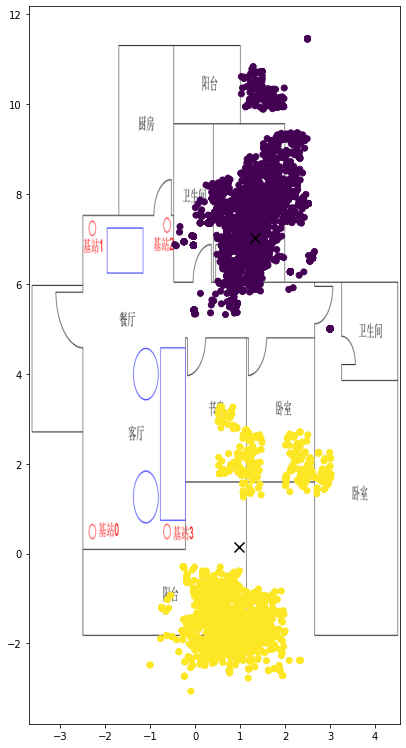

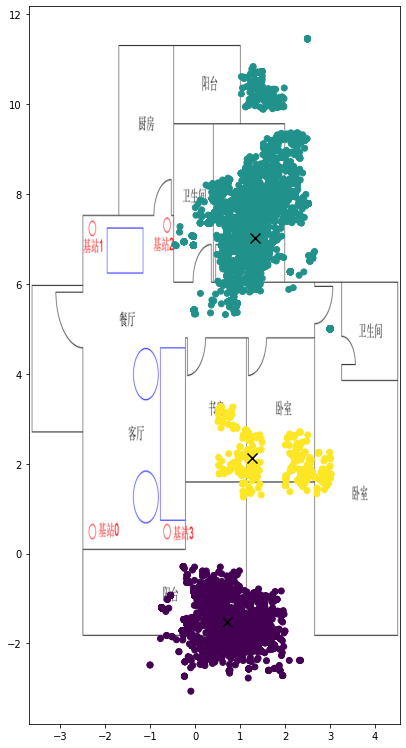

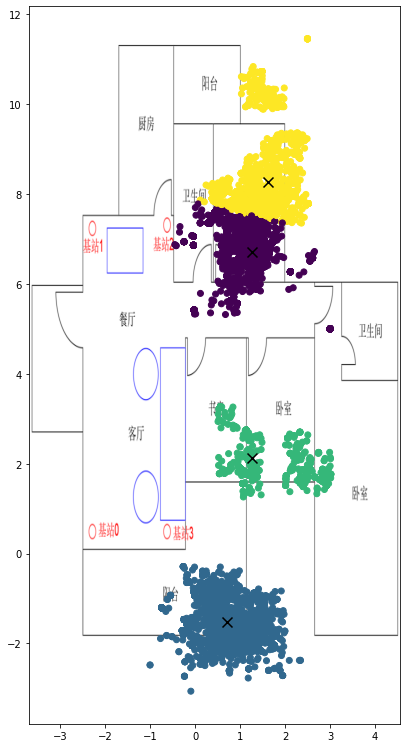

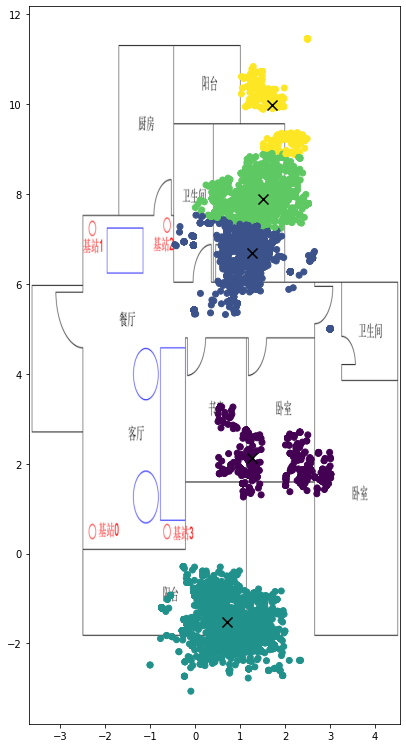

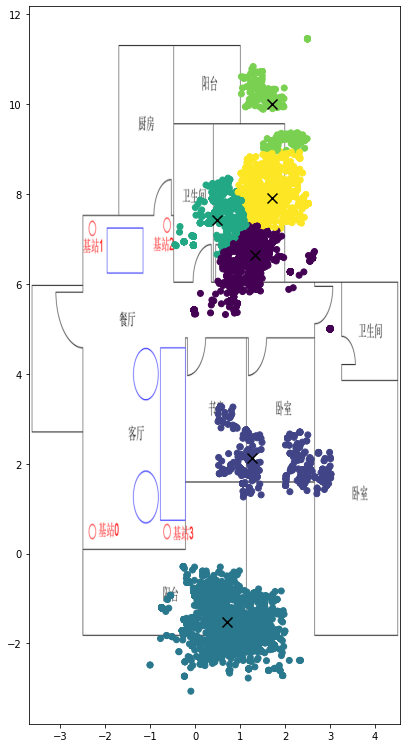

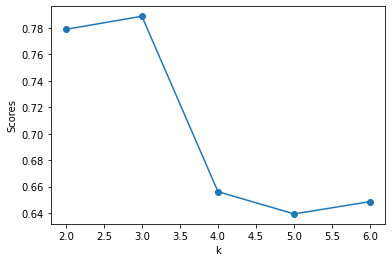

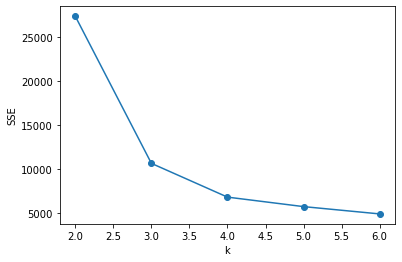

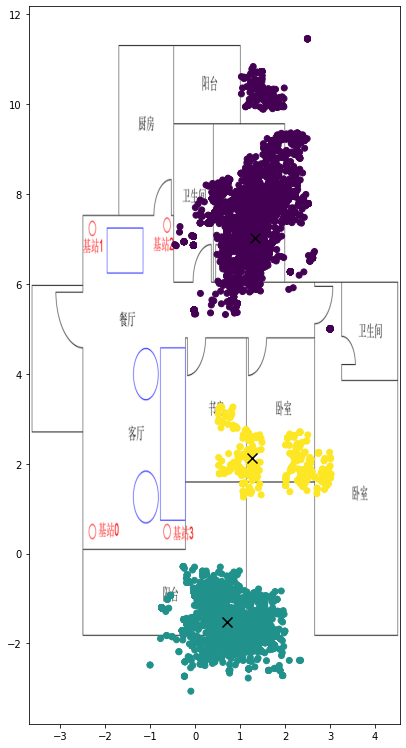

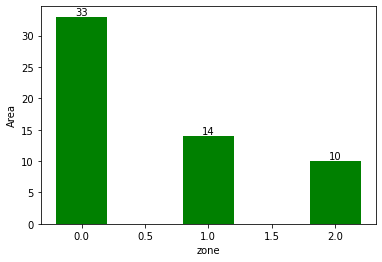

In [10]:
'''
整个14天的分区表示——聚类+画成热力图
'''
key="All"
data_allInOne = collectDataAllInOne(df_week)
groups,grids = createGrid(data_allInOne,key,column_num,row_num,max_x,min_x,max_y,min_y)
createHeatmap(grids,"heatmap_allInOne",map_img,res_path,unit,max_x,min_x,max_y,min_y)

# create excel writer object 输出每个点对应的网格
writer = pd.ExcelWriter('output.xlsx')
# write dataframe to excel
data_allInOne.to_excel(writer)
# save the excel
writer.save()
    
 # 删去点数小于min_count的网格中的点——剩余的点更加集中，便于聚类
choice_data_all=choose_spots(data_allInOne,groups,40)
x=choice_data_all['x']
y=choice_data_all['y']
# centers: 聚类后每一类的中心点坐标——根据中心点划定zone的范围
centers_all,y_pre_all = K_m(x,y,key,number_cluster,map_img,res_path,max_x,min_x,max_y,min_y)
choice_data_all['zone']=y_pre_all


dict_zones_all= get_dict_zones(choice_data_all,number_cluster[key])
zones_info_forall=get_zone_info("All",dict_zones_all,res_path)
intervals_in_zones,details = getTimeIntervalsForZones(dict_zones_all,data_allInOne,epsilon)

new_grids = createHeatmapByTime(dict_zones_all,"heatmap_allInOne",map_img,res_path,row_num,column_num,unit,max_x,min_x,max_y,min_y,groups)
createHeatmapByTime2(new_grids,"heatmap_allInOne",map_img,res_path,unit,max_x,min_x,max_y,min_y)


In [11]:


'''
按在家时间长短分为两类分析
首先处理数据，将数据分为两类并整合
'''
    
list_long_df=[]
list_short_df=[]
list_mid_df=[]

for idx,row in totaltimes.iterrows():
    if row['TimeAtHome']>600: # 10h以上 长时间
        list_long_df.append(collectData(dict_df,row['date']))
    elif row['TimeAtHome']<300: # 5h以下 短时间
        list_short_df.append(collectData(dict_df,row['date']))
    else:
        list_mid_df.append(collectData(dict_df,row['date']))

df_long = pd.concat(list_long_df,sort=False)
df_long.reset_index(drop=True, inplace=True) 

df_short = pd.concat(list_short_df,sort=False)
df_short.reset_index(drop=True, inplace=True) 

df_mid = pd.concat(list_mid_df,sort=False)
df_mid.reset_index(drop=True, inplace=True) 


After Collect Data:
                    time         x         y
0   2022-02-22 07:54:00  0.671528  6.760972
1   2022-02-22 07:55:00  1.431000  6.790717
2   2022-02-22 07:56:00  1.435000  6.790000
3   2022-02-22 07:57:00  1.435000  6.790000
4   2022-02-22 07:58:00  1.435000  6.790000
..                  ...       ...       ...
811 2022-02-22 21:25:00  2.976467  2.756036
812 2022-02-22 21:26:00  2.760000  3.028333
813 2022-02-22 21:27:00  2.760000  3.028333
814 2022-02-22 21:28:00  2.750726  3.018998
815 2022-02-22 21:29:00  1.994622  6.195071

[816 rows x 3 columns]
After Collect Data:
                    time         x         y
0   2022-02-23 07:19:00  1.390057  7.031773
1   2022-02-23 07:20:00  1.475714  6.994286
2   2022-02-23 07:21:00  1.475714  6.994286
3   2022-02-23 07:22:00  1.475714  6.994286
4   2022-02-23 07:23:00  1.475714  6.994286
..                  ...       ...       ...
881 2022-02-23 22:00:00  1.760000  7.680000
882 2022-02-23 22:01:00  1.163219  7.714219
883 2022-0

ValueError: No objects to concatenate

In [ ]:
'''
短时段在家的情况：totaltimes[key]<300
'''
zones_info_short=FinalAnalysis(df_short,"short",len(list_short_df)*1,number_cluster,
                                epsilon,row_num,column_num,map_img,res_path,unit,
                                max_x,min_x,max_y,min_y,groups)

'''
长时段在家的情况：totaltimes[key]>600
'''
zones_info_long=FinalAnalysis(df_long,"long",len(list_long_df)*1,number_cluster,
                                epsilon,row_num,column_num,map_img,res_path,unit,
                                max_x,min_x,max_y,min_y,groups)

print("===========> DONE <===========")

'''
中时段在家情况：totaltime[key]∈[300,600]
'''
zones_info_mid=FinalAnalysis(df_mid,"mid",len(list_mid_df)*1,number_cluster,
                                epsilon,row_num,column_num,map_img,res_path,unit,
                                max_x,min_x,max_y,min_y,groups)

print("===========> DONE <===========")



In [ ]:

'''
短时段在家的情况：totaltimes[key]<300
'''
zones_info_short2=FinalAnalysis(df_short,"short",len(list_short_df)*5,number_cluster,
                                epsilon,row_num,column_num,map_img,res_path,unit,
                                max_x,min_x,max_y,min_y,groups,withTimeLine=1)

'''
长时段在家的情况：totaltimes[key]>600
'''
zones_info_long2=FinalAnalysis(df_long,"long",len(list_long_df)*5,number_cluster,
                                epsilon,row_num,column_num,map_img,res_path,unit,
                                max_x,min_x,max_y,min_y,groups,withTimeLine=1)

print("===========> DONE <===========")

'''
中时段在家情况：totaltime[key]∈[300,600]
'''
zones_info_mid2=FinalAnalysis(df_mid,"mid",len(list_mid_df)*5,number_cluster,
                                epsilon,row_num,column_num,map_img,res_path,unit,
                                max_x,min_x,max_y,min_y,groups,withTimeLine=1)

print("===========> DONE <===========")



In [ ]:
'''
data:df_long  data_allInOne  [Dataframe]
zone_info: zones_info_long   zones_info_forall  [Dataframe]
[zone分区编号  labels(list)所含网格编号  Area]
'''
def stay_time(data,zone_info,key):
    # key:分区名称-value:对应的分区字典[key:时间段-value:出现的次数]
    dict_periods={}
    # 高于6分钟的时间段占总时间段的比例  All:所有时间段数量  MTS: 高于6分钟时间段的数量
    MTS_info=pd.DataFrame(columns=['zone','All','MTS','MTSPercentage'])
    for idx,row in zone_info.iterrows(): # 每个分区
        labels_now=row['labels'] # 分区所含的所有网格编号
        periods=[]  # 所有时间段
        
        count=0 # 计数 时间段长度
        for id,ro in data.iterrows():
            if ro['label'] in labels_now:
                count=count+1
            else:
                if count!=0:
                    periods.append(count)
                count=0
        set_periods=set(periods)
        dict={}
        for item in set_periods:
            dict.update({item:periods.count(item)}) # 某长度时间段出现的次数
        dict_periods.update({row['zone']:dict})
        
        n_pd = pd.DataFrame.from_dict(dict, orient='index')
        print(n_pd)

        # 画柱状图
        plt.figure()
        p1=plt.bar(list(dict.keys()),list(dict.values()) ,0.4,color="green")
        plt.bar_label(p1, label_type='edge',fontsize=12)
        plt.xlabel('Time interval/min')
        plt.ylabel('Counts')
        plt.savefig(res_path+key+"_zone="+str(row['zone'])+"_TimeIntervalCounts"+".png",dpi=300)
        
        # 计算数字特征
        MoreThanSix=0
        MTSlength=0
        AllPeriods=0
        Alllength=0
        for i in dict.keys():
            if int(i)>=6:
                MoreThanSix=MoreThanSix+dict[i]
                MTSlength=MTSlength+int(i)*dict[i]
            AllPeriods=AllPeriods+dict[i]
            Alllength=Alllength+int(i)*dict[i]
        MTSPercentage=MoreThanSix/AllPeriods
        print("zone:"+str(row['zone'])+":MTS="+str(MTSPercentage))

        
        newdf = pd.DataFrame({'zone':[ row['zone']],
        'All':[AllPeriods],
        'MTS':[MoreThanSix],
        'MTSPercentage':[MTSPercentage]})
        MTS_info=MTS_info.append(newdf,ignore_index=True)

    # 画MTS信息图
    # 绘柱状图
    plt.cla() #清空之前画的
    fig,ax1 = plt.subplots()
    ax2 = ax1.twinx() 
    
    x=list(MTS_info['zone'])
    y1=list(MTS_info['All'])
    y2=list(MTS_info['MTS'])
    y3=list(MTS_info['MTSPercentage'])
    
    ax1.bar(x, height=y1, label='All Periods',width = 0.5, facecolor='lightskyblue',edgecolor='white')
    ax1.bar(x, height=y2, label='Periods > 6min',width = 0.5, facecolor='steelblue',edgecolor='white')

    ax1.set_xlabel("zone")
    ax1.legend()
    
    # 画折线图
    ax2.plot(x, y3, "coral", ms=8, marker='*',label="MTS Percentage")
    # 在折线图上显示具体数值, ha参数控制水平对齐方式, va控制垂直对齐方式
    for x1, yy in zip(x, y3):
        ax2.text(x1, yy+0.02, str(round(yy, 3)), ha='center', va='bottom', fontsize=10, rotation=0)
    ax2.legend(loc="upper left")
    plt.savefig(res_path+key+"_MTSinfo"+".png",dpi=300)

    return dict_periods,MTS_info


periods_info_all,MTS_info_all=stay_time(data_allInOne,zones_info_forall,"All")
periods_info_long,MTS_info_long=stay_time(df_long,zones_info_long,"long")
periods_info_short,MTS_info_short=stay_time(df_short,zones_info_short,"short")
periods_info_mid,MTS_info_mid=stay_time(df_mid,zones_info_mid,"mid")